# Logistic Regression Analysis

In [1]:
# 라이브러리

### Logistic Regression Analysis : 로지스틱 회귀 모형

- 독립변수(입력 데이터)의 선형 결합으로 종속변수를 설명한다는 점에서 선형회귀분석과 유사
- 종속변수에 대해 연속형 데이터만 포함했던 선형회귀와 다르게 범주형 데이터를 포함할 수 있음
- 최종적으로 분류하려는 범주가 2개로 이루어진 경우에 사용하는 분류 알고리즘(이항 분류)
- 주요 매개변수
    - c : 모델의 일반화 성능 및 복잡도를 설정하며 값이 작을 수록 복잡도가 감소하고 값이 클 수록 복잡도가 증가
<br>
<img src='img/logistic1.png' width='400' height='200' align='left'>

In [5]:
# 로지스틱 회귀모델 실습용 데이터 생성
from sklearn.datasets import make_classification

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [51]:
# n_features(20)
# n_redundant : 독립변수 간의 선형상관관계가 있는 독립변수(2)
# n_informative : 독립변수 중 종속변수와 선형관계가 있는 독립변수(2)
# n_repeated : 독립변수 중 단순 중복인 독립변수(0)
# n_clusters_per_class : 범주당 클러스터의 개수(2) => 깔끔하게 분리되지 않는 결과
# n_classes : 종속변수의 범주 개수(2)

X1, y1 = make_classification(n_samples=100, n_features=1, n_redundant=0, n_informative=1,
                          n_clusters_per_class=1)

In [11]:
y

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0])

# Scikit-Learn을 이용한 로지스틱 회귀분석

# C가 큰경우

In [2]:
# 라이브러리
from sklearn.linear_model import LogisticRegression

In [3]:
# 10^9
1e9

1000000000.0

In [52]:
log1 = LogisticRegression(C =1000000000)

In [53]:
log1.fit(X1, y1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [8]:
#Scikit-Learn을 이용하여 추정한 회귀식의 alpha, beta 구하기

In [33]:
log1.intercept_[0]

0.6122792670546318

In [34]:
log1.coef_[0][0]

12.2480977185114

In [18]:
X

array([[ 1.34824127],
       [ 0.7562763 ],
       [ 0.97828841],
       [-0.01808617],
       [-2.18265759],
       [ 1.120404  ],
       [ 1.1087418 ],
       [-1.37841805],
       [ 1.2514645 ],
       [ 0.43343739],
       [ 1.06883779],
       [-1.25634214],
       [ 0.60774225],
       [ 0.54187438],
       [-1.00179059],
       [-0.32241149],
       [-1.79299717],
       [-0.99043093],
       [-0.68416456],
       [ 1.32513765],
       [-0.68729931],
       [ 1.69022086],
       [ 2.15433792],
       [ 0.92073285],
       [-0.38863562],
       [ 2.09440705],
       [-0.81983574],
       [-1.12940452],
       [-1.91767986],
       [-0.52516137],
       [ 0.26432768],
       [-2.18180423],
       [ 1.23220915],
       [ 1.12911386],
       [ 0.51499977],
       [-1.38340993],
       [-0.87074005],
       [ 0.08475634],
       [-1.73369835],
       [ 0.80155245],
       [-0.20187425],
       [ 1.10301129],
       [-1.26828758],
       [ 1.51575422],
       [-0.83658694],
       [ 0

In [23]:
import numpy as np
import matplotlib.pyplot as plt

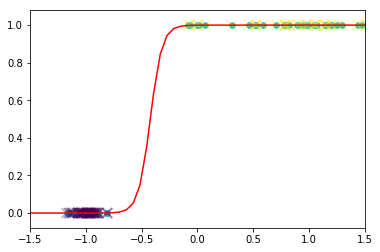

In [60]:
#추정한 회귀식을 그래프상에 나타내자.
# Scikit-learn에서는 theta를 구할 때 predict함수를 사용하기보다 실제 식을 작성해보자.
# 공식으로 그리기 위한 인위적인 작업
x = np.linspace(-3, 3, 100)
y = np.exp(log1.intercept_[0]+log1.coef_[0][0]*x)/(1+np.exp(log1.intercept_[0]+log1.coef_[0][0]*x))
plt.plot(x, y, color='r')
# 실제 독립변수와 종속변수의 산점도(o로 표현)
plt.scatter(X1, y1, marker='o', s=30, color='c')
# 실제 독립변수와 모형을 통해 나온 예측값(x로 표현)

plt.scatter(X1, log1.predict(X1), marker='x', c=y1, s=100, lw=2, alpha=.3)
plt.xlim(-1.5, 1.5)
plt.show()


In [55]:
log1.score(X1, y1)

1.0

# C가 작은경우

In [56]:
log2 = LogisticRegression(C=0.1)

In [57]:
log2.fit(X1, y1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
#Scikit-Learn을 이용하여 추정한 회귀식의 alpha, beta 구하기
log2.intercept_

array([-0.00229395])

In [47]:
log2.coef_

array([[1.6283565]])

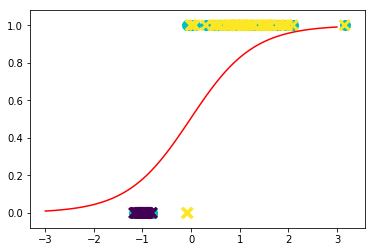

In [61]:
#추정한 회귀식을 그래프상에 나타내자.
# Scikit-learn에서는 theta를 구할 때 predict함수를 사용하기보다 실제 식을 작성해보자.
# 실제 독립변수와 종속변수의 산점도(o로 표현)
#실제 독립변수와 모형을 통해 나온 예측값(x로 표현)
x2 = np.linspace(-3,3,100)
y2 = np.exp(log2.intercept_[0]+log2.coef_[0][0]*x2)/(1+np.exp(log2.intercept_[0]+log2.coef_[0][0]*x2))
plt.plot(x2, y2, color='r')

plt.scatter(X1, y1, marker='o', c='c', s=100)

plt.scatter(X1, log2.predict(X1), marker='x', s=100, c=y1, lw=3)
plt.show()

In [62]:
log2.score(X1, y1)

0.98